# Gov Exploratory Analysis - 2nd step

### Etapa de entendimento do dataset gerado pela etapa de engenharia de dados. Esta etapa realiza as primeiras análises quanto as informações obtidas e consolidadas do datasus junto com o entendimento do que cada informação representa junto ao contexto do problema.

### Author: Marcos Vinicius Ribeiro Silva

## Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
%matplotlib inline

## Read new dataset generated in first step

In [2]:
if 'data.csv' not in os.listdir(os.getcwd()):
    raise Exception('Run 1st step script!')

df = pd.read_csv('data.csv')
df.head()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,MES,ANO,ESTADO
0,2280868,330010,NaN,NaN,NaN,1º,M,3,28503308000179,1,...,45,15,0,12,3,201810,3999,10,18,RJ
1,2280868,330010,NaN,NaN,NaN,1º,M,3,28503308000179,1,...,92,8,0,0,8,201810,3999,10,18,RJ
2,2280868,330010,NaN,NaN,NaN,1º,M,3,28503308000179,1,...,81,6,0,4,2,201810,3999,10,18,RJ
3,2280868,330010,NaN,NaN,NaN,1º,M,3,28503308000179,1,...,6,6,0,6,0,201810,3999,10,18,RJ
4,2280868,330010,NaN,NaN,NaN,1º,M,3,28503308000179,1,...,47,4,0,4,0,201810,3999,10,18,RJ


## Init analysis

In [3]:
df.shape
print('Number of registers: %d, number of features: %d' % df.shape)

Number of registers: 3548753, number of features: 31


In [4]:
df.dtypes

CNES          int64
CODUFMUN      int64
REGSAUDE     object
MICR_REG     object
DISTRSAN     object
DISTRADM     object
TPGESTAO     object
PF_PJ         int64
CPF_CNPJ      int64
NIV_DEP       int64
CNPJ_MAN      int64
ESFERA_A    float64
ATIVIDAD      int64
RETENCAO    float64
NATUREZA    float64
CLIENTEL    float64
TP_UNID       int64
TURNO_AT      int64
NIV_HIER    float64
TERCEIRO    float64
TP_LEITO      int64
CODLEITO      int64
QT_EXIST      int64
QT_CONTR      int64
QT_SUS        int64
QT_NSUS       int64
COMPETEN      int64
NAT_JUR       int64
MES           int64
ANO           int64
ESTADO       object
dtype: object

In [5]:
states = list(set(df.ESTADO))
print('Number of states in dataset: %d' % len(states))
print('States: %s' % ', '.join(states))

Number of states in dataset: 27
States: MS, BA, RJ, GO, AL, ES, SE, AP, SC, CE, MG, PR, MT, RR, RN, DF, TO, AC, RS, PB, SP, PA, PE, AM, PI, RO, MA


In [6]:
years = list(set(df.ANO))
print('Years in dataset: %s' % ', '.join([str(x) for x in years]))

Years in dataset: 17, 18, 19, 20, 21, 22


In [7]:
df.describe()

,CNES,CODUFMUN,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,...,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,MES,ANO
count,3.548753e+06,3.548753e+06,3548753.0,3.548753e+06,3.548753e+06,3.548753e+06,0.0,3.548753e+06,0.0,0.0,...,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06
mean,3.157448e+06,3.329415e+05,3.0,2.480531e+13,1.772286e+00,9.225907e+12,NaN,3.944763e+00,NaN,NaN,...,2.818507e+00,3.505544e+01,1.026084e+01,3.154347e-03,6.876253e+00,3.384589e+00,2.019564e+05,2.294558e+03,6.424174e+00,1.949949e+01
std,1.981151e+06,1.012121e+05,0.0,2.894667e+13,9.737283e-01,1.920943e+13,NaN,4.846117e-01,NaN,NaN,...,1.676554e+00,2.549182e+01,1.838685e+01,1.858530e-01,1.537006e+01,9.837920e+00,1.694882e+02,1.150481e+03,3.412092e+00,1.695713e+00
min,2.700000e+01,1.100010e+05,3.0,0.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,NaN,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017010e+05,1.015000e+03,1.000000e+00,1.700000e+01
25%,2.237253e+06,2.611600e+05,3.0,3.944290e+11,1.000000e+00,0.000000e+00,NaN,4.000000e+00,NaN,NaN,...,1.000000e+00,1.000000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.018070e+05,1.244000e+03,3.000000e+00,1.800000e+01
50%,2.509113e+06,3.303500e+05,3.0,1.236127e+13,1.000000e+00,0.000000e+00,NaN,4.000000e+00,NaN,NaN,...,2.000000e+00,3.300000e+01,5.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.020010e+05,2.062000e+03,6.000000e+00,2.000000e+01
75%,3.030415e+06,4.112500e+05,3.0,4.464981e+13,3.000000e+00,8.241754e+12,NaN,4.000000e+00,NaN,NaN,...,4.000000e+00,4.500000e+01,1.000000e+01,0.000000e+00,8.000000e+00,3.000000e+00,2.021060e+05,3.999000e+03,9.000000e+00,2.100000e+01
max,9.997784e+06,5.301800e+05,3.0,9.871488e+13,3.000000e+00,9.722813e+13,NaN,5.000000e+00,NaN,NaN,...,7.000000e+00,9.600000e+01,1.730000e+03,2.800000e+01,1.730000e+03,4.070000e+02,2.022110e+05,3.999000e+03,1.200000e+01,2.200000e+01


In [8]:
df.sample(20)

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,MES,ANO,ESTADO
135607,3312089,280290,02,NaN,NaN,NaN,M,3,57071000120,1,...,13,2,0,0,2,201704,2062,4,17,SE
864971,2287285,330100,0001,NaN,NaN,NaN,M,3,29251097000197,1,...,44,22,0,19,3,201708,2062,8,17,RJ
2780296,2412241,291170,030,NaN,NaN,NaN,M,3,14129613000138,1,...,10,2,0,1,1,201708,2062,8,17,BA
2590967,5195063,270430,NaN,NaN,NaN,NaN,M,3,1454407000151,1,...,32,18,0,0,18,201802,2240,2,18,AL
2747704,3003361,350600,206,NaN,NaN,NaN,M,3,45011798000105,1,...,43,14,0,0,14,202006,3999,6,20,SP
2915393,2127989,315250,0010,315250,NaN,NaN,M,3,23951916000475,3,...,9,12,0,10,2,201801,3069,1,18,MG
3396624,2139049,314870,0019,NaN,NaN,NaN,D,3,23430945000149,1,...,41,3,0,0,3,201807,3999,7,18,MG
1305154,2374501,241420,00I,NaN,NaN,NaN,M,3,0,3,...,3,3,0,3,0,201908,1244,8,19,RN
3332365,2781859,411370,017,NaN,NaN,NaN,D,3,78640489000315,3,...,45,11,0,11,0,201703,1112,3,17,PR
2727766,2082101,355220,216,NaN,NaN,NaN,M,3,44649812008899,1,...,38,1,0,0,1,201902,2054,2,19,SP


In [9]:
features = [x for x in df.keys()]
for feature in features:
    null_index = df[df[feature].isnull()]
    print('Qtde null values in %s: %d' % (feature, len(null_index)))

Qtde null values in CNES: 0
Qtde null values in CODUFMUN: 0
Qtde null values in REGSAUDE: 955422
Qtde null values in MICR_REG: 3265821
Qtde null values in DISTRSAN: 3277743
Qtde null values in DISTRADM: 3402214
Qtde null values in TPGESTAO: 0
Qtde null values in PF_PJ: 0
Qtde null values in CPF_CNPJ: 0
Qtde null values in NIV_DEP: 0
Qtde null values in CNPJ_MAN: 0
Qtde null values in ESFERA_A: 3548753
Qtde null values in ATIVIDAD: 0
Qtde null values in RETENCAO: 3548753
Qtde null values in NATUREZA: 3548753
Qtde null values in CLIENTEL: 9127
Qtde null values in TP_UNID: 0
Qtde null values in TURNO_AT: 0
Qtde null values in NIV_HIER: 3548753
Qtde null values in TERCEIRO: 3548753
Qtde null values in TP_LEITO: 0
Qtde null values in CODLEITO: 0
Qtde null values in QT_EXIST: 0
Qtde null values in QT_CONTR: 0
Qtde null values in QT_SUS: 0
Qtde null values in QT_NSUS: 0
Qtde null values in COMPETEN: 0
Qtde null values in NAT_JUR: 0
Qtde null values in MES: 0
Qtde null values in ANO: 0
Qtde nu

## First conclusion

Primeiro poodemos consolidar o dataset criado na primeira etapa de engenharia de dados.

O dataset possui 3548753 registros e 31 caracteristicas.

O dataset possui todos os 27 estados brasileiros e os dados de 2017 a 2021.

O dataset possui as seguintes caracterisitcas que conforme o dicionário de dados (disponível [aqui](\dicionario.pdf)) representam:

|**Ordem**|**Característica**|**Tipo de Dado**|**Definição**|
|:-|:----|:-----|:---------------------------------------------|
|1|CNES|int64|"Número nacional do estabelecimento de saúde"|
|2|CODUFMUN|int64|Código do município do estabelecimento UF + MUNIC (sem dígito)|
|3|REGSAUDE|string|Código da região de saúde|
|4|MICR_REG|string|Código da micro-região de saúde|
|5|DISTRSAN|string|Código do distrito sanitário|
|6|DISTRADM|string|Código do distrito administrativo|
|7|TPGESTAO|string|Gestão de saúde|
|8|PF_PJ|int64|Indicador de pessoa: 1-Física 3-Jurídica|
|9|CPF_CNPJ|int64|CPF do Estabelecimento, caso pessoa física OU CNPJ, caso pessoa jurídica|
|10|NIV_DEP|int64|Grau de dependência: 1-Individual 3-Mantida|
|11|CNPJ_MAN|int64|CPF do Estabelecimento, caso pessoa física OU CNPJ, caso pessoa jurídica|
|12|ESFERA_A|float64|Código da esfera administrativa|
|13|ATIVIDAD|int64|Código da esfera administrativa|
|14|RETENCAO|float64|Código de retenção de tributos|
|15|NATUREZA|float64|Código da natureza da organização|
|16|CLIENTEL|float64|Código de fluxo da clientela|
|17|TP_UNID|int64|Tipo de unidade (Estabelecimento)|
|18|TURNO_AT|int64|Código de turno de atendimento|
|19|NIV_HIER|float64|Código do nível de hierarquia|
|20|TERCEIRO|float64|O estabelecimento é terceiro: 1-Sim 0-Não|
|21|TP_LEITO|int64|Tipo do LEITO|
|22|CODLEITO|int64|Especialidade do LEITO|
|23|QT_EXIST|int64|Quantidade de leitos existentes|
|24|QT_CONTR|int64|Quantidade de leitos contratados|
|25|QT_SUS|int64|Quantidade de leitos para o SUS|
|26|QT_NSUS|int64|Quantidade de leitos NÃO para o SUS|
|27|COMPETEN|int64|Ano e Mês de competência da informação (AAAAMM)|
|28|NAT_JUR|int64|Natureza Jurídica|
|29|MES|int64|Mês de origem dos dados|
|30|ANO|int64|Ano de origem dos dados|
|31|ESTADO|string|Estado de origem dos dados|

## Dataset refine (features selection)

Para buscar o objetivo principal do projeto sob a análise inicial do dataset, é viável a seleção de algumas _features_ do dataset que serão relevantes a etapa de análise, são elas:

* CODUFMUN = Código do município do estabelecimento UF + MUNIC (sem dígito);
* TP_UNID = Tipo de unidade (Estabelecimento);
* QT_EXIST = Quantidade de leitos existentes;
* QT_SUS = Quantidade de leitos para o SUS;
* QT_NSUS = Quantidade de leitos NÃO para o SUS;
* MES = Mês da Amostra;
* ANO = Ano da Amostra;
* ESTADO = Estado da Amostra;

Para melhor agrupamento de dados, outras _features_ serão criadas a partir das features já existentes, são elas:

* CODUF = Código do estado a partir da _feature_ CODUFMUN;
* CODMUN = Código do município (+ calculo do dígito) a partir da _feature_ CODUFMUN;
* REGIAO = Região do estado a partir da _feature_ ESTADO;

Após o refinamento vamos agrupar as quantidades agrupadas em mês, ano e estado para poder aplicar o análise exploratória categorizado em ano, mês e estado

In [10]:
new_features = ['CODUFMUN', 'TP_UNID', 'QT_EXIST', 'QT_SUS', 'QT_NSUS', 'MES', 'ANO', 'ESTADO']

new_df = df.copy()
for feature in new_df.keys():
    if feature not in new_features:
        new_df = new_df.drop(feature, axis=1)

new_df.sample(10)

,CODUFMUN,TP_UNID,QT_EXIST,QT_SUS,QT_NSUS,MES,ANO,ESTADO
1179037,311940,5,2,0,2,1,17,MG
1409915,230533,15,6,6,0,5,21,CE
2445893,330455,5,3,0,3,11,17,RJ
1002314,240090,5,5,5,0,8,20,RN
1403483,410045,5,2,2,0,12,18,PR
2668141,260410,5,2,0,2,8,21,PE
3497319,290890,5,5,5,0,10,22,BA
3522624,150820,5,7,7,0,10,21,PA
2330127,351550,5,11,7,4,11,18,SP
1830173,521010,5,2,2,0,7,19,GO


In [11]:
north = ['RR', 'AP', 'AM', 'PA', 'AC', 'RO', 'TO']
northeast = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
midwest = ['MT', 'DF', 'GO', 'MS']
southeast = ['MG', 'ES', 'RJ', 'SP']
south = ['PR', 'SC', 'RS']

regions = {'NO': north, 'NE': northeast, 'CO': midwest, 'SE': southeast, 'SU': south}

def get_region(festate):
    for region, values in regions.items():
        if festate in values:
            return region
    return Null

def calc_ibge_digit(cod6: str):
   a = int(cod6[0])
   b = (int(cod6[1]) * 2) % 10 + (int(cod6[1]) * 2) // 10
   c = int(cod6[2])
   d = (int(cod6[3]) * 2) % 10 + (int(cod6[3]) * 2) // 10
   e = int(cod6[4])
   f = (int(cod6[5]) * 2) % 10 + (int(cod6[5]) * 2) // 10
   digit = (10 - (a + b + c + d + e + f) % 10) % 10
   return str(digit)

new_df['REGIAO'] = [get_region(x) for x in new_df['ESTADO']]

f = lambda s: list([s[0:2], s+calc_ibge_digit(s)])
new_df['CODUF'], new_df['CODMUN'] = zip(*[f(x) for x in new_df['CODUFMUN'].astype(str)])

new_df.sample(10)

,CODUFMUN,TP_UNID,QT_EXIST,QT_SUS,QT_NSUS,MES,ANO,ESTADO,REGIAO,CODUF,CODMUN
2701522,431560,5,4,2,2,2,18,RS,SU,43,4315602
1238191,411710,5,9,7,2,1,21,PR,SU,41,4117107
2343281,312910,5,1,1,0,10,19,MG,SE,31,3129103
1095922,500320,20,3,0,3,9,22,MS,CO,50,5003207
2367674,310160,5,1,1,0,2,22,MG,SE,31,3101607
3081155,270430,5,1,0,1,10,18,AL,NE,27,2704302
1995795,431680,5,7,3,4,6,20,RS,SU,43,4316808
570728,320520,5,6,0,6,11,19,ES,SE,32,3205200
1573061,431690,5,2,0,2,6,22,RS,SU,43,4316907
3529231,410480,5,8,5,3,9,20,PR,SU,41,4104808


In [12]:
new_df.describe()

,CODUFMUN,TP_UNID,QT_EXIST,QT_SUS,QT_NSUS,MES,ANO
count,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06,3.548753e+06
mean,3.329415e+05,7.875205e+00,1.026084e+01,6.876253e+00,3.384589e+00,6.424174e+00,1.949949e+01
std,1.012121e+05,1.115305e+01,1.838685e+01,1.537006e+01,9.837920e+00,3.412092e+00,1.695713e+00
min,1.100010e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
25%,2.611600e+05,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.800000e+01
50%,3.303500e+05,5.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,2.000000e+01
75%,4.112500e+05,5.000000e+00,1.000000e+01,8.000000e+00,3.000000e+00,9.000000e+00,2.100000e+01
max,5.301800e+05,8.300000e+01,1.730000e+03,1.730000e+03,4.070000e+02,1.200000e+01,2.200000e+01


In [13]:
new_df.dtypes

CODUFMUN     int64
TP_UNID      int64
QT_EXIST     int64
QT_SUS       int64
QT_NSUS      int64
MES          int64
ANO          int64
ESTADO      object
REGIAO      object
CODUF       object
CODMUN      object
dtype: object

## Searching null values

In [14]:
features = [x for x in new_df.keys()]
for feature in features:
    null_index = new_df[new_df[feature].isnull()]
    print('Qtde null values in %s: %d' % (feature, len(null_index)))

Qtde null values in CODUFMUN: 0
Qtde null values in TP_UNID: 0
Qtde null values in QT_EXIST: 0
Qtde null values in QT_SUS: 0
Qtde null values in QT_NSUS: 0
Qtde null values in MES: 0
Qtde null values in ANO: 0
Qtde null values in ESTADO: 0
Qtde null values in REGIAO: 0
Qtde null values in CODUF: 0
Qtde null values in CODMUN: 0


## Searching for outliers (graphs per state)

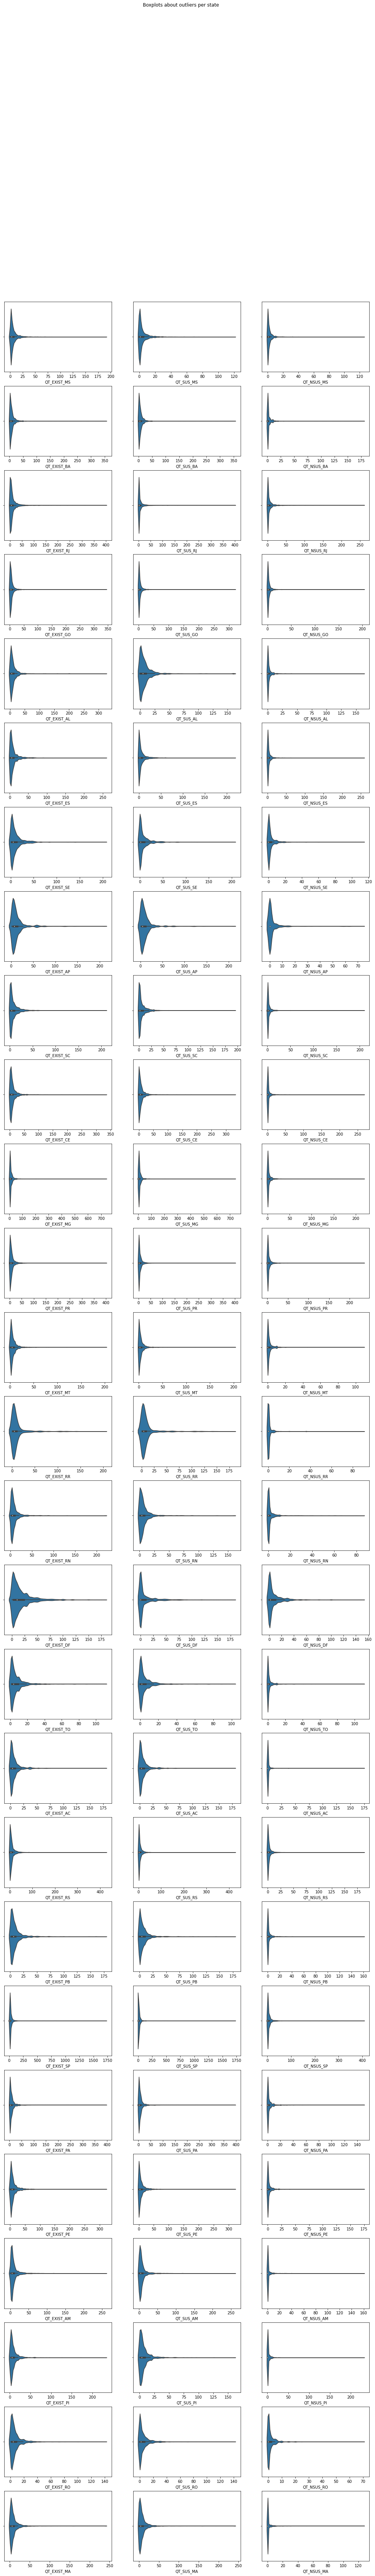

In [15]:
feature_analysis = ['QT_EXIST', 'QT_SUS', 'QT_NSUS']
states = list(set(new_df.ESTADO))

df_outliers = new_df.copy()
for feature in df_outliers.keys():
    if feature not in feature_analysis + ['ESTADO']:
        df_outliers = df_outliers.drop(feature, axis=1)

rcParams['figure.figsize'] = 17, len(states)*4
fig, ax = plt.subplots(ncols=len(feature_analysis), nrows=len(states))
plt.suptitle("Boxplots about outliers per state")

igraph = 0
for state in states:
    df_outliers_state = df_outliers[df_outliers.ESTADO == state]
    
    new_features = {}
    for key in df_outliers_state.keys():
        new_features.update({key: '{}_{}'.format(key, state)})
    
    df_outliers_state = df_outliers_state.rename(columns=new_features)

    for feature in feature_analysis:
        sns.violinplot(df_outliers_state['{}_{}'.format(feature, state)],
                       ax=ax[states.index(state)][feature_analysis.index(feature)])
        igraph += 1

## Save new data

In [16]:
new_df.to_csv('new_data.csv', index=False)

## New dataset generated